in this file we are goining to find out diffrent effect of diffrent way for first initialze the parameters in a neural net 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from init_utils import *  

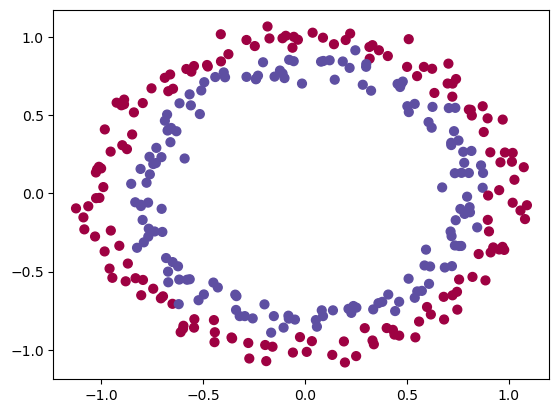

In [2]:
X_train , y_train , X_test , y_test = load_dataset()

# create the model 

In [11]:
def accuracy(y_hat , y):
    y_pred = (y_hat >= 0.5) * 1
    acc = np.sum(y_pred == y) / y.shape[1]
    return acc 

In [68]:
def predict(X,param):
    A_ , cache = forward_propagation(X,param)
    A_ = (A_ >= 0.5 ) *1
    return A_

In [30]:
def model(initialize , alpha=0.01 , epochs = 15000 , X = X_train , y = y_train , X_t = X_test , y_t = y_test  ):
    param = initialize((X.shape[0], 10, 5, 1))
    costs = []
    accuracies = []
    accuracies_test = []
    for i in range(epochs):
        AL , cache = forward_propagation(X , param)
        AL_t , cache_t = forward_propagation(X_t , param)
        cost = compute_loss(AL,y)
        costs.append(cost)
        grad = backward_propagation(X,y,cache)
        param = update_parameters(param,grad,alpha)
        acc = accuracy(AL , y)
        accuracies.append(acc)
        acc_test = accuracy(AL_t,y_t)
        accuracies_test.append(acc_test)
        if i %1000 == 0 :
            print(f"iteration:{i}\ncost:{cost}\naccuracy:{acc}\ntest accuracy:{acc_test}\n*******************************")
    
    plt.Figure(figsize=(26,4))
    plt.subplot(1,3,1)
    plt.plot(costs)
    plt.title("cost")
    plt.subplot(1,3,2)
    plt.plot(accuracies)
    plt.title("accuracy")
    plt.subplot(1,3,3)
    plt.plot(accuracies_test)
    plt.title("test accuracy")
    return param

# 1 _ Zero initialize

In [31]:
def initialize_parameters_zeros(dims):
    L = len(dims)
    param = {}
    for l in range(1,L):
        param["W"+str(l)] = np.zeros((dims[l],dims[l-1]))
        param["b"+str(l)] = np.zeros((dims[l],1))

    return param 



iteration:0
cost:0.6931471805599453
accuracy:0.5
test accuracy:0.5
*******************************
iteration:1000
cost:0.6931471805599453
accuracy:0.5
test accuracy:0.5
*******************************
iteration:2000
cost:0.6931471805599453
accuracy:0.5
test accuracy:0.5
*******************************
iteration:3000
cost:0.6931471805599453
accuracy:0.5
test accuracy:0.5
*******************************
iteration:4000
cost:0.6931471805599453
accuracy:0.5
test accuracy:0.5
*******************************
iteration:5000
cost:0.6931471805599453
accuracy:0.5
test accuracy:0.5
*******************************
iteration:6000
cost:0.6931471805599453
accuracy:0.5
test accuracy:0.5
*******************************
iteration:7000
cost:0.6931471805599453
accuracy:0.5
test accuracy:0.5
*******************************
iteration:8000
cost:0.6931471805599453
accuracy:0.5
test accuracy:0.5
*******************************
iteration:9000
cost:0.6931471805599453
accuracy:0.5
test accuracy:0.5
***************

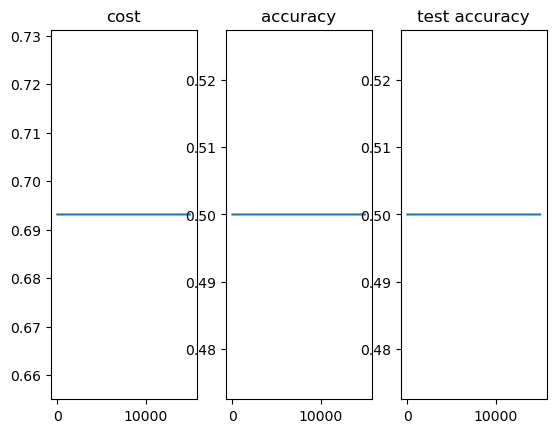

In [33]:
parameters_zero_model = model(initialize_parameters_zeros)

In [74]:
print(predict(X_test,parameters_zero_model),predict(X_train , parameters_zero_model),sep="\n")

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1]]


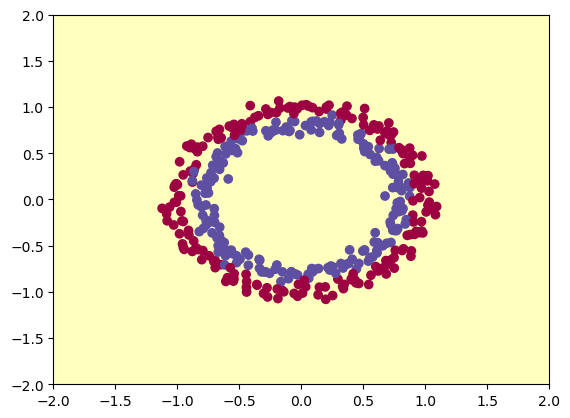

In [56]:
X_grid , Y_grid = np.meshgrid(np.linspace(-2,2,100),np.linspace(-2,2,100))
input_grid = np.vstack((X_grid.ravel(),Y_grid.ravel()))
Z_grid = predict(input_grid,parameters_zero_model)
plt.contourf(X_grid,Y_grid,Z_grid.reshape(X_grid.shape),cmap=plt.cm.Spectral)
plt.scatter(X_train[0,:] , X_train[1,:],c=y_train,cmap=plt.cm.Spectral)
plt.scatter(X_test[0,:] , X_test[1,:],c=y_test,cmap=plt.cm.Spectral)


# 2 _ inizialize with big random number 

In [61]:
def inizialize_parameters_random(dims):
    L = len(dims)
    param = {}
    for l in range(1,L):
        param["W"+str(l)] = np.random.randn(dims[l],dims[l-1]) *  10
        param["b"+str(l)] = np.zeros((dims[l],1))

    return param 

c:\Users\ARMA\Desktop\github\Improving-Deep-Neural-Networks\initiailization\init_utils.py:17: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))
c:\Users\ARMA\Desktop\github\Improving-Deep-Neural-Networks\initiailization\init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
c:\Users\ARMA\Desktop\github\Improving-Deep-Neural-Networks\initiailization\init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


iteration:0
cost:inf
accuracy:0.49666666666666665
test accuracy:0.5
*******************************
iteration:1000
cost:0.3859208405775744
accuracy:0.8333333333333334
test accuracy:0.82
*******************************
iteration:2000
cost:0.27609395597669467
accuracy:0.85
test accuracy:0.83
*******************************
iteration:3000
cost:0.2676333376184553
accuracy:0.85
test accuracy:0.83
*******************************
iteration:4000
cost:0.26175719017097226
accuracy:0.8533333333333334
test accuracy:0.84
*******************************
iteration:5000
cost:0.2542059416021156
accuracy:0.8566666666666667
test accuracy:0.84
*******************************
iteration:6000
cost:0.24991156362577985
accuracy:0.8566666666666667
test accuracy:0.84
*******************************
iteration:7000
cost:0.24308387185080857
accuracy:0.86
test accuracy:0.84
*******************************
iteration:8000
cost:0.22017947111699537
accuracy:0.8833333333333333
test accuracy:0.84
*************************

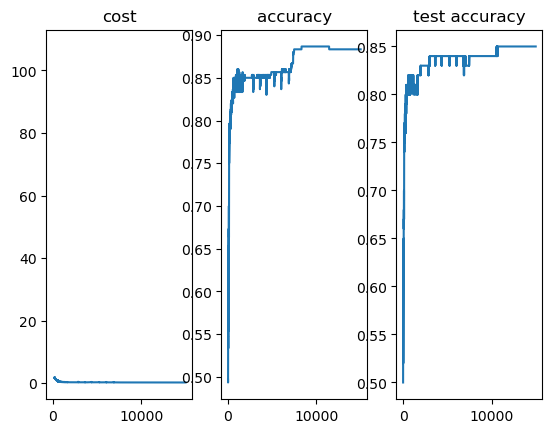

In [63]:
parameters_bigrandom_model = model(inizialize_parameters_random)

In [75]:
print(predict(X_test,parameters_bigrandom_model),predict(X_train , parameters_bigrandom_model),sep="\n")

[[1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1
  0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0]]
[[1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0
  0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0
  0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0
  0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1
  1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0
  1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1
  1 1 0 1 0 0 0 1 1 1 1 0]]


c:\Users\ARMA\Desktop\github\Improving-Deep-Neural-Networks\initiailization\init_utils.py:17: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))


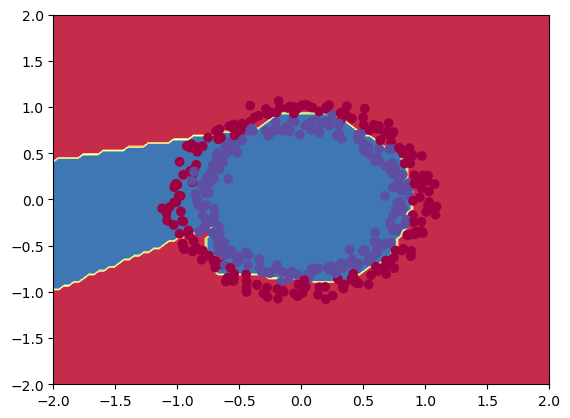

In [69]:
X_grid , Y_grid = np.meshgrid(np.linspace(-2,2,100),np.linspace(-2,2,100))
input_grid = np.vstack((X_grid.ravel(),Y_grid.ravel()))
Z_grid = predict(input_grid,parameters_bigrandom_model)
plt.contourf(X_grid,Y_grid,Z_grid.reshape(X_grid.shape),cmap=plt.cm.Spectral)
plt.scatter(X_train[0,:] , X_train[1,:],c=y_train,cmap=plt.cm.Spectral)
plt.scatter(X_test[0,:] , X_test[1,:],c=y_test,cmap=plt.cm.Spectral)


# 3 _ he 
this method come from paper back to 2015 

In [70]:
def inizialize_parameters_he(dims):
    L = len(dims)
    param = {}
    for l in range(1,L):
        param["W"+str(l)] = np.random.randn(dims[l],dims[l-1]) *  np.sqrt(2 / dims[l-1])
        param["b"+str(l)] = np.zeros((dims[l],1))

    return param 

iteration:0
cost:0.7173197732727592
accuracy:0.49666666666666665
test accuracy:0.49
*******************************
iteration:1000
cost:0.6201092444285866
accuracy:0.7766666666666666
test accuracy:0.78
*******************************
iteration:2000
cost:0.5339749419860937
accuracy:0.9266666666666666
test accuracy:0.95
*******************************
iteration:3000
cost:0.4186336088642467
accuracy:0.9366666666666666
test accuracy:0.97
*******************************
iteration:4000
cost:0.3046324668583439
accuracy:0.9633333333333334
test accuracy:0.97
*******************************
iteration:5000
cost:0.22323757106386255
accuracy:0.9766666666666667
test accuracy:0.95
*******************************
iteration:6000
cost:0.17284050843812168
accuracy:0.9733333333333334
test accuracy:0.94
*******************************
iteration:7000
cost:0.13977798239039346
accuracy:0.9833333333333333
test accuracy:0.96
*******************************
iteration:8000
cost:0.11724602293025713
accuracy:0.9833

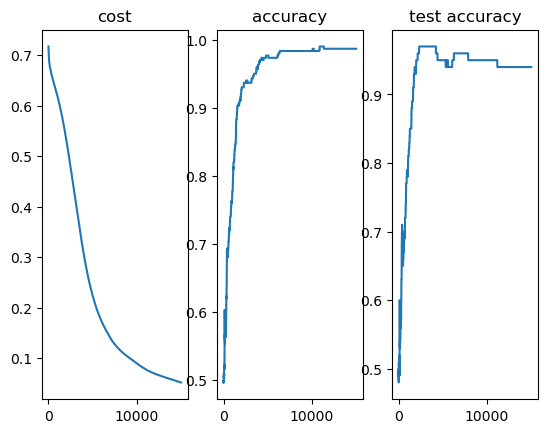

In [78]:
parameters_he_model = model(inizialize_parameters_he)

In [79]:
print(predict(X_test,parameters_bigrandom_model),predict(X_train , parameters_bigrandom_model),sep="\n")

[[1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1
  0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0]]
[[1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0
  0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0
  0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0
  0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1
  1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0
  1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1
  1 1 0 1 0 0 0 1 1 1 1 0]]


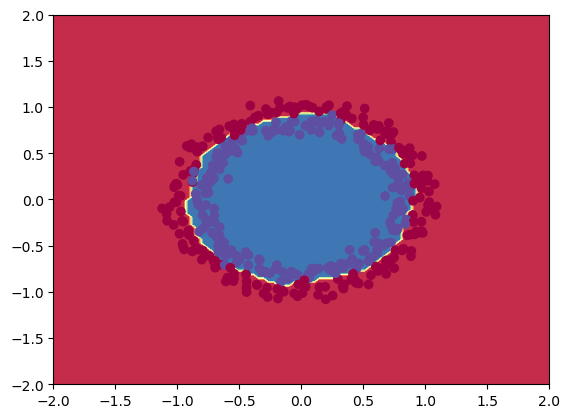

In [80]:
X_grid , Y_grid = np.meshgrid(np.linspace(-2,2,100),np.linspace(-2,2,100))
input_grid = np.vstack((X_grid.ravel(),Y_grid.ravel()))
Z_grid = predict(input_grid,parameters_he_model)
plt.contourf(X_grid,Y_grid,Z_grid.reshape(X_grid.shape),cmap=plt.cm.Spectral)
plt.scatter(X_train[0,:] , X_train[1,:],c=y_train,cmap=plt.cm.Spectral)
plt.scatter(X_test[0,:] , X_test[1,:],c=y_test,cmap=plt.cm.Spectral)


- so as you can see we get the best result with he initialization 
- and it is very important to use the wright method for inizialization 
- and if we dont inizialize correctly we can not fix it with train longer  